In [4]:
import csv, os
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import random
import math
import sys

In [296]:
x1 = np.arange(10)
x2 = np.arange(5,15)+np.random.randn(len(x1))*10
x3 = np.arange(50,60)+np.random.randn(len(x1))*5
y = x1*15+x2*10+20+np.random.randn(len(x1))*10+x3

In [297]:
trainX = np.array([x1,x2,x3]).T
trainY = np.array(y)

In [298]:
trainX = np.c_[np.ones(trainX.shape[0]), trainX]

In [299]:
trainX

array([[ 1.        ,  0.        , 23.39667502, 48.62414776],
       [ 1.        ,  1.        , 18.44238551, 45.33050777],
       [ 1.        ,  2.        , 13.93158497, 55.57234382],
       [ 1.        ,  3.        , 15.05333686, 47.41186969],
       [ 1.        ,  4.        , -9.78088936, 54.39069732],
       [ 1.        ,  5.        ,  8.10519007, 62.54960623],
       [ 1.        ,  6.        ,  8.13827766, 48.88271138],
       [ 1.        ,  7.        ,  2.691033  , 60.43202357],
       [ 1.        ,  8.        , -1.14148833, 54.70894404],
       [ 1.        ,  9.        , 23.37080139, 51.5152356 ]])

In [300]:
trainY

array([305.96650147, 268.57547716, 241.78742438, 258.90651622,
        50.17142655, 245.46656288, 248.57220817, 203.64751627,
       173.47108227, 437.34806014])

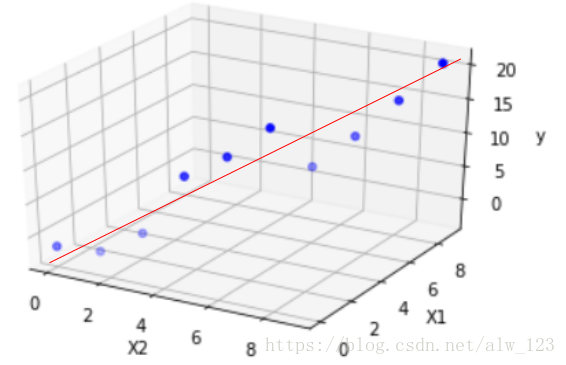

## 1.手动实现Gradient方法

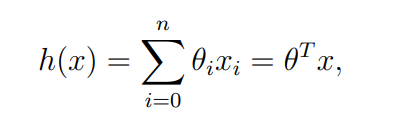

In [240]:
# define h(x)
def h(Theta, X, y):
    # Theta: weights
    return np.dot(X, Theta.T)

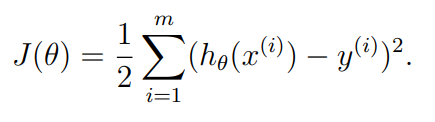

In [241]:
# define loss function J
def J(Theta, X, y):
    loss = 1/2*sum((h(Theta, X, y) - y)**2)
    return loss

In [242]:
Theta = np.zeros(trainX.shape[1])

In [243]:
Theta = np.array([0.1,0.2,0.3,0.4])

In [244]:
h(Theta,trainX, trainY)

array([22.61815718, 24.28401287, 26.28300802, 19.63117481, 25.86957629,
       22.18610277, 28.15384269, 28.6667339 , 28.65313161, 27.79059496])

In [245]:
J(Theta, trainX, trainY)

248301.1706577489

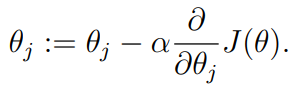

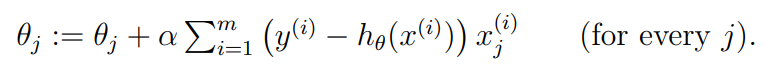

In [283]:
def grad_calc(Theta, trainX, trainY, lr = 0.1, iterations = 100000):
    cost = np.zeros(iterations)
    m = trainX.shape[0]
    for i in range(iterations):
        error = trainY - np.dot(trainX, Theta.T)
        for j in range(len(Theta)):
            Theta[j] = Theta[j] + (1.0/m)*lr*np.dot(error,trainX[:, j])
        cost[i] = J(Theta, trainX, trainY)
    return Theta, cost

In [263]:
# 归一化
def normalize(data):
    for i in range(1, data.shape[1] - 1):
        data[:,i] = ((data[:, i] - np.mean(data[:, i]))/np.std(data[:,i]))

In [276]:
trainXLess = trainX[:, 1:]

In [277]:
trainXLess

array([[ 0.00000000e+00, -4.21618217e-02,  5.00000000e+01],
       [ 1.00000000e+00,  4.28514180e-01,  5.10000000e+01],
       [ 2.00000000e+00,  1.04630273e+00,  5.20000000e+01],
       [ 3.00000000e+00, -2.15606687e+00,  5.30000000e+01],
       [ 4.00000000e+00,  3.33820169e-01,  5.40000000e+01],
       [ 5.00000000e+00, -1.55773814e+00,  5.50000000e+01],
       [ 6.00000000e+00,  8.12626238e-01,  5.60000000e+01],
       [ 7.00000000e+00,  7.74159477e-01,  5.70000000e+01],
       [ 8.00000000e+00,  5.03196085e-01,  5.80000000e+01],
       [ 9.00000000e+00, -1.42652043e-01,  5.90000000e+01]])

In [278]:
normalize(trainXLess)

In [279]:
trainXLess = np.c_[np.ones(trainXLess.shape[0]), trainXLess]

In [288]:
Theta = np.array([0.0,0.0,0.0,0.0])

In [322]:
co_ef, arr = grad_calc(Theta, trainXLess, trainY, lr = 0.00001, iterations = 40000)

In [324]:
h(co_ef, trainX, trainY)

array([487.54989441, 415.03984536, 409.37884623, 383.55339826,
       132.48827927, 371.33188084, 308.01028175, 297.69995214,
       226.81689069, 488.96308748])

In [325]:
trainY

array([305.96650147, 268.57547716, 241.78742438, 258.90651622,
        50.17142655, 245.46656288, 248.57220817, 203.64751627,
       173.47108227, 437.34806014])

Q: If I do normalization, do I need to normalize x and y both or just x?

## 2. Closed Form

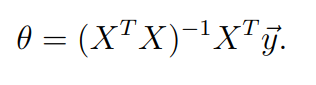

In [303]:
w_cf = inv(trainX.T.dot(trainX)).dot(trainX.T).dot(trainY)
cost_wcf = np.sum((trainX.dot(w_cf)-trainY)**2) / len(trainX)
hori = [cost_wcf for i in range(20000-3)]

In [304]:
w_cf

array([39.60048862, 13.94042601,  9.73049165,  0.78589167])

In [326]:
h(w_cf, trainX, trainY)

array([305.47495241, 268.61926138, 246.71635405, 265.15872889,
        42.93452647, 237.32731763, 240.84900324, 210.86156885,
       183.0119575 , 432.95910511])

In [327]:
trainY

array([305.96650147, 268.57547716, 241.78742438, 258.90651622,
        50.17142655, 245.46656288, 248.57220817, 203.64751627,
       173.47108227, 437.34806014])

## 3. scikit-learn

In [307]:
from sklearn import linear_model
import numpy as np


In [308]:
model = linear_model.LinearRegression()

In [310]:
model.fit(trainX, trainY)

LinearRegression()

In [311]:
display(model.intercept_)

39.60048861654619

In [314]:
display(model.coef_)

array([ 0.        , 13.94042601,  9.73049165,  0.78589167])

In [320]:
model.predict(trainX)

array([305.47495241, 268.61926138, 246.71635405, 265.15872889,
        42.93452647, 237.32731763, 240.84900324, 210.86156885,
       183.0119575 , 432.95910511])

In [321]:
trainY

array([305.96650147, 268.57547716, 241.78742438, 258.90651622,
        50.17142655, 245.46656288, 248.57220817, 203.64751627,
       173.47108227, 437.34806014])